**Universidad Nacional de Colombia**

**Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

**Leidy Natalia León Carvajal**

**lnleonc@unal.edu.co**

## **Regresión y Clasificación**

### **Punto 1: Breast Cancer Winsconsin**

### Construya una red neuronal de clasificación binaria para predecir el cáncer de seno. Use los datos Breast Cancer Wisconsin.

### Importaremos las librerías necesarias para trabajar:

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Cargamos los modelos

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Activation, Dropout

### Cargaremos ahora la base de datos obtenida de [https://www.kaggle.com/uciml/breast-cancer-wisconsin-data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [237]:
cancer=pd.read_csv('/home/natalia/Documentos/Jupyter Lab/breastcancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Retiramos la última columna que contiene 'Nan'

In [238]:
del cancer['Unnamed: 32']
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Realizaremos ahora un preprocesamiento de los datos, eligiendo a la variable **diagnosis** como dependiente.

In [239]:
x = cancer.iloc[:,2:].values # extrae como tensores numpy
y = cancer.iloc[:,1].values

print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B'

### Recodificamos ahora la variable **diagnosis**:

In [240]:
labelencoder_y = LabelEncoder()
diagnosis = labelencoder_y.fit_transform(y)
print(diagnosis)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

### Seleccionaremos nuestro conjunto de datos de entrenamiento y de prueba

In [241]:
x_train, x_test, diag_train, diag_test = train_test_split(x, diagnosis, test_size = 0.1, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(512, 30)
(57, 30)


### A continuación estandarizamos las covariables:

In [242]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Generamos un modelo secuencial Modo 2

In [243]:
clasificador = Sequential()
clasificador.add(Dense(units=16, activation='relu', input_shape=(30,)))
clasificador.add(Dropout(0.1))
clasificador.add(Dense(units=16, activation='relu'))
clasificador.add(Dropout(0.1))
clasificador.add(Dense(units=1, activation='sigmoid'))


### Entrenamos nuestros datos

In [244]:
# Usaremos el compilador "ADAM"
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_32 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_33 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [245]:
historico = clasificador.fit(x_train, diag_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 0s 18ms/step - loss: 0.7149 - accuracy: 0.5599 - val_loss: 0.6676 - val_accuracy: 0.6311
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.6103 - accuracy: 0.7066 - val_loss: 0.5560 - val_accuracy: 0.7961
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5281 - accuracy: 0.7848 - val_loss: 0.4479 - val_accuracy: 0.8641
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.4263 - accuracy: 0.8557 - val_loss: 0.3509 - val_accuracy: 0.9126
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3527 - accuracy: 0.9095 - val_loss: 0.2727 - val_accuracy: 0.9515
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.9046 - val_loss: 0.2156 - val_accuracy: 0.9612
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2471 - accuracy: 0.9193 - val_loss: 0.1756 - val_accuracy: 0.9612
Epoch 8/150


### Realizamos las predicciones correspondientes:

In [246]:
diag_pred = clasificador.predict(x_test)
diag_pred[diag_pred > 0.5] = 1
diag_pred[diag_pred <=0.5] = 0
diag_pred.shape

(57, 1)

### Obtenemos la matriz de confusión:

In [247]:
cm = confusion_matrix(diag_test, diag_pred)
print("Nuestro porcentaje de precisión es {}%".format(((cm[0][0] + cm[1][1])/diag_test.shape[0])*100))

Nuestro porcentaje de precisión es 98.24561403508771%


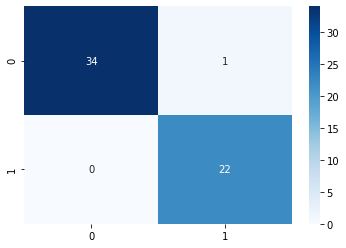

In [248]:
sb.heatmap(cm,annot=True,cmap="Blues")
plt.savefig('mc.png')

### Finalmente evaluaremos nuestro modelo:

In [249]:
def plot_metric(historico, metric):
    train_metrics = historico.history[metric]
    val_metrics = historico.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y Validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
  

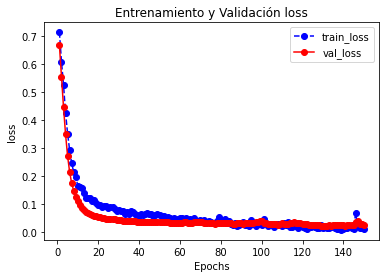

<Figure size 432x288 with 0 Axes>

In [250]:
plot_metric(historico, 'loss')
plt.savefig('loss.png')

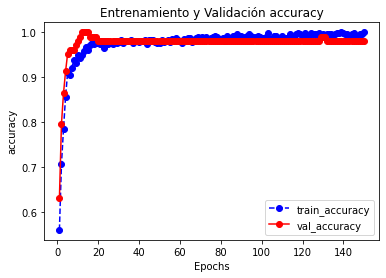

<Figure size 432x288 with 0 Axes>

In [251]:
plot_metric(historico, 'accuracy')
plt.savefig('accuracy.png')

### **Punto 2: Boston Housing**

### Construya una red neuronal de regresión para predecir el precio de las viviendas. Use los datos Boston Housing. 

### Cargaremos la base de datos correspondiente

In [252]:
from sklearn.datasets import load_boston
datos=load_boston()
boston = pd.DataFrame(datos.data, columns = datos.feature_names)
boston["target"] = datos.target
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Preprocesamiento:

In [253]:
boston.isna().sum()
boston = boston.dropna()

### Codificaremos la variable "CHAS"

In [254]:
boston = pd.concat([boston,pd.get_dummies(boston['CHAS'], prefix='CHAS')],axis=1)
boston.drop(['CHAS'],axis=1, inplace=True)
boston.head(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,CHAS_0.0,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0


### Creamos nuestros conjuntos de entrenamiento y prueba

In [255]:
train_boston = boston.sample(frac=0.8,random_state=0)
test_boston = boston.drop(train_boston.index)

In [256]:
train_data = train_boston.describe()
train_data.pop("target")
train_data = train_data.transpose()
train_data.head()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800


In [257]:
train_labels = train_boston.pop("target")
test_labels = test_boston.pop("target")

### Estadarizamos nuestros datos

In [258]:
def norm(x):
  return (x - train_data['mean']) / train_data['std']
normed_train_data = norm(train_boston)
normed_test_data = norm(test_boston)

### A continuación elaboramos el modelo

In [259]:
class Regression(Model):
    def __init__(self):
        super(Regression,self).__init__()
        self.dense1 = Dense(64, activation='relu')
        self.dropout1 = Dropout(0.4)
        self.dense2 = Dense(64, activation='relu')
        self.dropout2 = Dropout(0.4)
        self.dense_out = Dense(1)

    def call(self,x):
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        return(self.dense_out(x))

model = Regression()

### Compilamos el modelo usando "Adam":

In [260]:
optim = tf.keras.optimizers.Adam()
model.compile(loss='mse',
                optimizer=optim,
                metrics=['mae', 'mse'])

### Procedemos a entrenar el modelo:

In [268]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

epochs = 1000

historico = model.fit(
  normed_train_data, train_labels,
  epochs=epochs, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [262]:
model.summary()

Model: "regression_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             multiple                  960       
_________________________________________________________________
dropout_34 (Dropout)         multiple                  0         
_________________________________________________________________
dense_52 (Dense)             multiple                  4160      
_________________________________________________________________
dropout_35 (Dropout)         multiple                  0         
_________________________________________________________________
dense_53 (Dense)             multiple                  65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [263]:
hist = pd.DataFrame(historico.history)
hist['epoch'] = historico.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,17.514879,3.127440,17.514879,14.981297,2.746612,14.981297,995
996,18.432003,2.970251,18.432003,13.569155,2.525334,13.569155,996
997,15.944071,3.070545,15.944071,12.619026,2.384913,12.619026,997
998,17.828825,2.957018,17.828825,12.474941,2.383549,12.474941,998
999,16.995237,3.088903,16.995237,12.190855,2.304109,12.190855,999


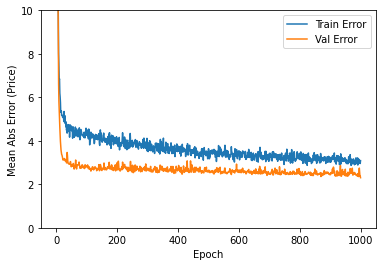

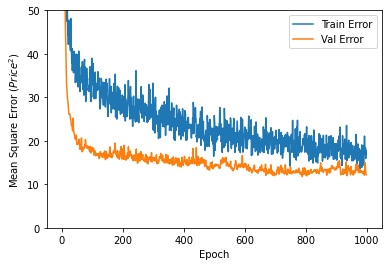

<Figure size 432x288 with 0 Axes>

In [264]:
def plot_history(historico):
  hist = pd.DataFrame(historico.history)
  hist['epoch'] = historico.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error (Price)')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error ($Price^2$)')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()
  plt.show()


plot_history(historico)
plt.savefig('historic.png')

In [265]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Price".format(mae))

4/4 - 0s - loss: 5.4016 - mae: 1.7754 - mse: 5.4016
Testing set Mean Abs Error:  1.78 Price


### Ahora realizamos las predicciones:

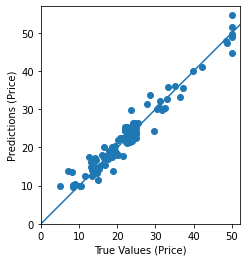

In [266]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values (Price)')
plt.ylabel('Predictions (Price)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('predictions.png')

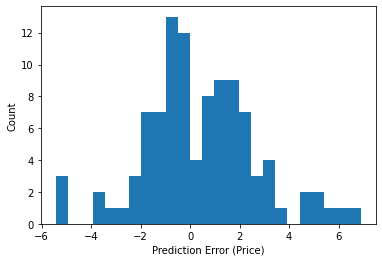

In [267]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error (Price)")
_ = plt.ylabel("Count")
plt.savefig('prederror.png')